# The Hull White Model


In the Hull White model, the short-rate follows the following process.
\begin{equation}
dr_t = [\theta_t - a r_t]dt + \sigma dW_t
\end{equation}

[Brigo, Mercurio, Interest Rate Models, 2006 ed., page 73-74]. We can instead define the process as,
\begin{equation}
dx_t = - a x_t dt + \sigma dW_t
\end{equation}
where $r_t = \alpha_t + x_t$, i.e. the short rate is the sum of a deterministic $\alpha$ and a stochastic $x$.

In this case, to fit the term structure of interest rates, $\alpha_t$ is given by
\begin{equation}
\alpha_t = f^M_t + \frac{\sigma^2}{2a^2}(1-e^{-at})^2
\end{equation}


# PDE for a contract

Let $V$ be the price of the contract. $V_x$ and $V_{xx}$ are the derivatives w.r.t. $x$.
The change in the price of the contract
\begin{equation}
-V_xax_tdt + V_{xx}\frac{\sigma^2}{2}dt + dV
\end{equation}
must offset the carry cost of the contract $-rVdt$

In [1]:
from sympy import *

dV, V, Vx, Vxx, sigma, a, r, dx, dt, x = symbols("dV V V_x V_{xx} sigma a r dx, dt, x")

In [2]:
hw_expr = dV + sigma * sigma / 2 * Vxx * dt - a * x * Vx * dt - r * V * dt
Eq(hw_expr, 0)

# Crank-Nicolson method.


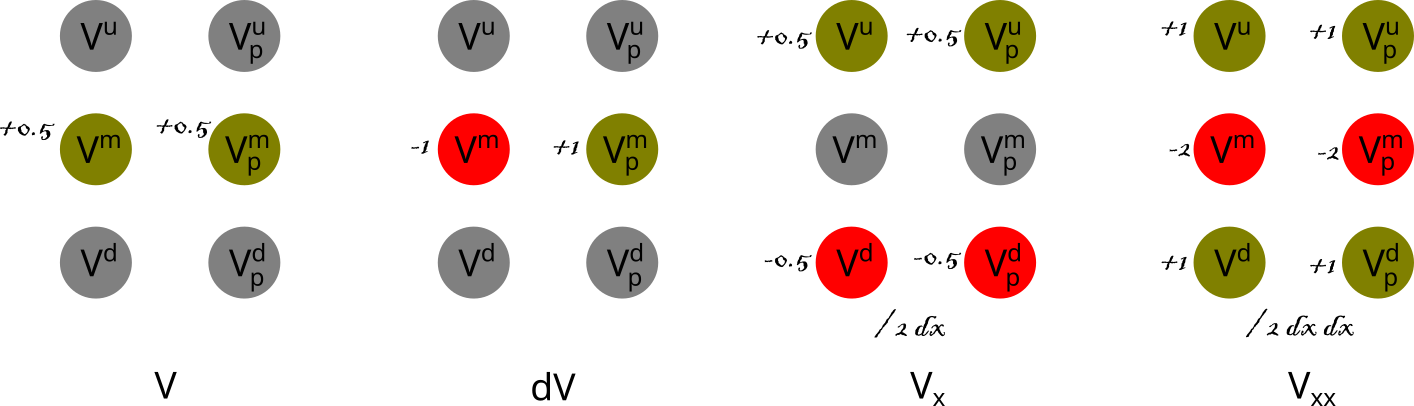

In [3]:
Vu, Vm, Vd, Vu_p, Vm_p, Vd_p = symbols("V^u V^m, V^d, V^u_p, V^m_p, V^d_p")

We will now substitute $V$, $dV$, $V_x$, and $V_{xx}$ in the above PDE, by the discrete estimates based on the Crank-Nicolson method.

In [4]:
expr = hw_expr.subs(V, (Vm + Vm_p)/2)
expr = expr.subs(dV, (Vm_p - Vm))
expr = expr.subs(Vx, ((Vu-Vd)/2 + (Vu_p-Vd_p)/2)/(2*dx))
expr = expr.subs(Vxx, ((Vu+Vd-2*Vm) + (Vu_p+Vd_p-2*Vm_p))/(2*dx*dx))
Eq(expr, 0)

We now need to find the coefficients of $V^u_p$, $V^m_p$, $V^d_p$, $V^u$, $V^m$, $V^d$


To find the coefficient of $V^u_p$, substitute $V^u_p$ to 1, and set the others to zero. Repeat for each of the other values.

In [5]:
def simplify(ex, terms):
  coefs = {}
  for symbol in terms:
    coef = ex.subs(symbol, 1)
    for other in terms:
      if symbol != coef:
        coef = coef.subs(other, 0)
    coefs[symbol] = coef
  return coefs

coefs = simplify(expr, [Vu_p, Vm_p, Vd_p, Vu, Vm, Vd])

In [6]:
coefs[Vu_p]

In [7]:
coefs[Vm_p]

In [8]:
coefs[Vd_p]

In [9]:
coefs[Vu]

In [10]:
coefs[Vm]

In [11]:
coefs[Vd]

Therefore, if we re-arranged the equation into the form:

\begin{equation}
A_l \cdot \begin{bmatrix} V^u_l \\ V^m_l \\ V^d_l \end{bmatrix} =
A_r \cdot \begin{bmatrix} V^u_r \\ V^m_r \\ V^d_r \end{bmatrix}
\end{equation}

$A_r$ is given by

In [12]:
-Matrix([[coefs[Vu_p], coefs[Vm_p],  coefs[Vd_p]]])

$A_l$  is given by

In [13]:
Matrix([[coefs[Vu], coefs[Vm],  coefs[Vd]]])

# Grid Boundary

## Upper Boundary.
In the upper boundary there is no $V^u_l$ or $V^u_r$.

In [14]:
expr_up = hw_expr.subs(V, (Vm + Vm_p)/2)
expr_up = expr_up.subs(dV, (Vm_p - Vm))
expr_up = expr_up.subs(Vx, ((Vm-Vd)/2 + (Vm_p-Vd_p)/2)/(dx))
expr_up = expr_up.subs(Vxx, 0)

coefs_up = simplify(expr_up, [Vu_p, Vm_p, Vd_p, Vu, Vm, Vd])


$A_r$ is given by.

In [15]:
-Matrix([[coefs_up[Vu_p], coefs_up[Vm_p],  coefs_up[Vd_p]]])

$A_{l}$ is now given by.

In [16]:
Matrix([[coefs_up[Vu], coefs_up[Vm],  coefs_up[Vd]]])


## Lower Boundary
In the lower boundary there is no $V^d_l$ or $V^d_r$.

In [17]:
expr_dn = hw_expr.subs(V, (Vm + Vm_p)/2)
expr_dn = expr_dn.subs(dV, (Vm_p - Vm))
expr_dn = expr_dn.subs(Vx, ((Vu-Vm)/2 + (Vu_p-Vm_p)/2)/(dx))
expr_dn = expr_dn.subs(Vxx, 0)

coefs_dn = simplify(expr_dn, [Vu_p, Vm_p, Vd_p, Vu, Vm, Vd])

$A_{r}$ is now given by.

In [18]:
-Matrix([[coefs_dn[Vu_p], coefs_dn[Vm_p],  coefs_dn[Vd_p]]])

$A_{l}$ is now given by.

In [19]:
Matrix([[coefs_dn[Vu], coefs_dn[Vm],  coefs_dn[Vd]]])


In [21]:
m = coefs_dn[Vu], coefs_dn[Vm],  coefs_dn[Vd]
print(m)